In [22]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

import stan_jupyter as stan
import pandas as pd

## Question 1

In [23]:
df_full = pd.read_csv("../data/Howell1.csv", delimiter=";")
df = df_full[df_full.age>=18].copy()

In [24]:
with open("models/w2_1.stan", "r") as f:
    model_code = f.read()

model_data = {"N":len(df),
              "weight":df.weight.tolist(),
              "height":df.height.tolist(),
              "X_BAR":df.height.mean()
             }
              

In [25]:
%%capture m1_build_log
m1_build = stan.build(model_code, model_data)

In [26]:
%%capture m1_fit_log
m1 = m1_build.sample(num_chains=4, num_samples=1000)

In [27]:
az.summary(m1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,45.008,0.224,44.606,45.436,0.004,0.003,3868.0,2651.0,1.0
beta,0.628,0.029,0.571,0.681,0.000,0.000,4025.0,2989.0,1.0
sigma,4.259,0.164,3.959,4.579,0.003,0.002,4348.0,2704.0,1.0
y_pred[0],43.193,4.315,35.289,51.623,0.066,0.047,4248.0,3972.0,1.0
y_pred[1],35.531,4.321,27.089,43.578,0.068,0.048,4036.0,3739.0,1.0
...,...,...,...,...,...,...,...,...,...
y_pred[347],50.086,4.276,41.651,57.851,0.067,0.048,4024.0,4014.0,1.0
y_pred[348],37.658,4.279,29.901,45.634,0.068,0.048,3918.0,4103.0,1.0
y_pred[349],50.000,4.317,42.186,58.174,0.069,0.049,3915.0,3969.0,1.0
y_pred[350],46.086,4.231,38.267,54.028,0.069,0.049,3740.0,3985.0,1.0


In [28]:
heights = [140, 160, 175]

for height in heights:
    pred_weight = stats.norm.rvs(loc = m1['alpha'] + m1['beta']*(height-df.height.mean()),
                                 scale=m1['sigma'])
    print(f"The average predicted weight for someone {height}cm tall is {pred_weight.mean().round(2)}kg.")
    print(f"The compatibility interval (HPDI) for such a weight is {az.hdi(pred_weight, .89)}.\n")

The average predicted weight for someone 140cm tall is 35.66kg.
The compatibility interval (HPDI) for such a weight is [28.94406264 42.63704243].

The average predicted weight for someone 160cm tall is 48.38kg.
The compatibility interval (HPDI) for such a weight is [41.45247328 54.74675182].

The average predicted weight for someone 175cm tall is 57.87kg.
The compatibility interval (HPDI) for such a weight is [51.10698967 64.46210866].



## Question 2

In [29]:
df = df_full[df_full.age<13].copy()

For the total effect of age on weight, we include the part the is mediated by height. So, for the moment, we exclude height from the model.

Priors:
- alpha ~ normal(50, 10)
- beta ~ normal(0, 5)
- sigma ~ uniform(0, 20)

Text(0.5, 1.0, 'Prior probability of weight')

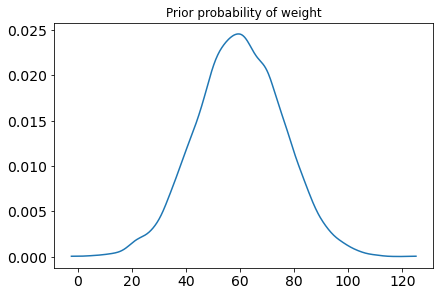

In [30]:
sample_alpha = stats.norm.rvs(loc=60, scale=15, size=10000)
sample_beta = stats.norm.rvs(loc=2, scale=2, size=10000)
sample_sigma = stats.uniform.rvs(loc=0, scale=10, size=10000)
prior_weight = stats.norm.rvs(loc=sample_alpha, scale=sample_sigma)
az.plot_kde(prior_weight)
plt.title("Prior probability of weight")

Text(0.5, 0, 'Age')

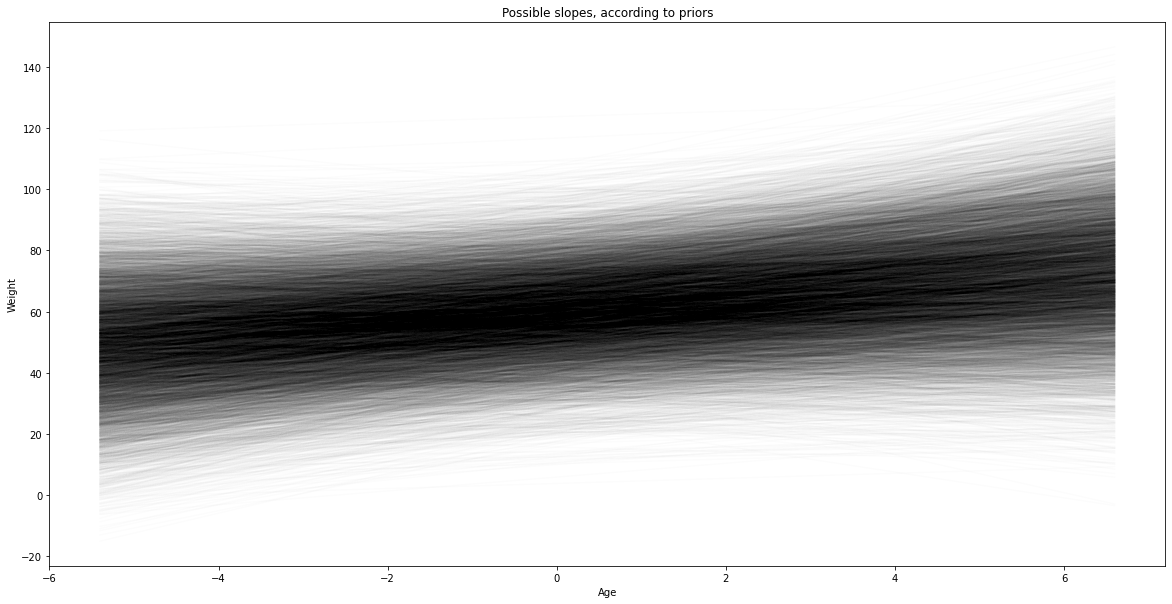

In [31]:
plt.figure(figsize=(20,10))
for i in range(1, 10000):
    plt.plot(
        df.age-df.age.mean(),
        sample_alpha[i]+sample_beta[i]*(df.age-df.age.mean()),
        color='black',
        alpha=.01)
plt.title("Possible slopes, according to priors")
plt.ylabel("Weight")
plt.xlabel("Age")

In [32]:
with open("models/w2_2.stan", "r") as f:
    model_code = f.read()

model_data = {"N":len(df),
              "weight":df.weight.tolist(),
              "age":df.age.tolist(),
              "X_BAR":df.age.mean()
             }

In [33]:
%%capture m2_build_log
m2_build = stan.build(model_code, model_data)

In [34]:
%%capture m2_fit_log
m2 = m2_build.sample(num_chains=4, num_samples=1000)

In [35]:
az.summary(m2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,14.704,0.212,14.330,15.123,0.003,0.002,3998.0,3061.0,1.0
beta,1.340,0.057,1.232,1.446,0.001,0.001,3860.0,2628.0,1.0
sigma,2.565,0.155,2.283,2.858,0.003,0.002,3913.0,2557.0,1.0
y_pred[0],23.572,2.594,18.581,28.387,0.041,0.029,3967.0,3971.0,1.0
y_pred[1],18.226,2.561,13.336,22.966,0.042,0.030,3771.0,3582.0,1.0
...,...,...,...,...,...,...,...,...,...
y_pred[141],15.481,2.549,10.445,20.035,0.041,0.029,3930.0,3888.0,1.0
y_pred[142],16.876,2.568,11.933,21.616,0.040,0.028,4076.0,3763.0,1.0
y_pred[143],8.764,2.636,3.726,13.743,0.041,0.029,4142.0,3971.0,1.0
y_pred[144],8.753,2.597,3.905,13.755,0.042,0.030,3823.0,3775.0,1.0


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'y_pred'}>,
        <AxesSubplot:title={'center':'y_pred'}>]], dtype=object)

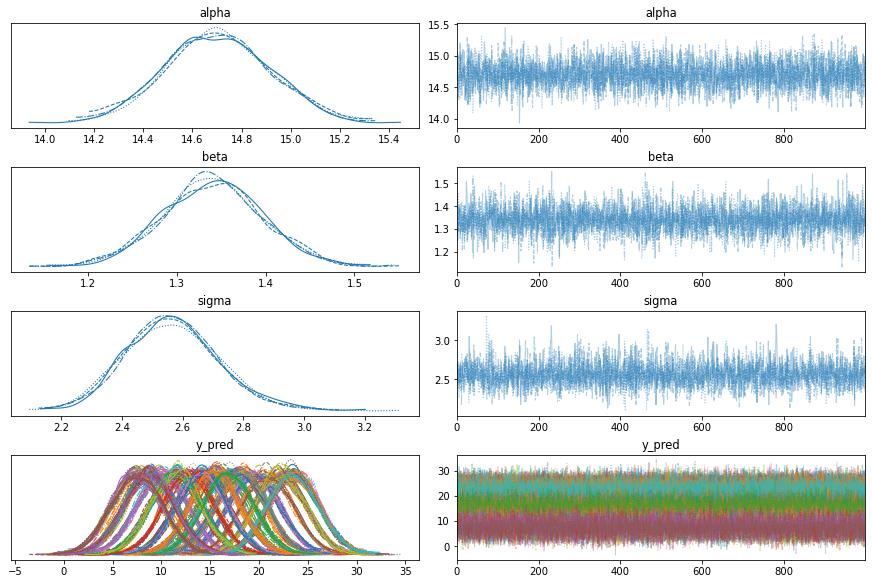

In [36]:
az.plot_trace(m2)

## Question 3

In [37]:
df["sex"] = np.where(df.male==0,1,2)

In [38]:
with open("models/w2_3.stan", "r") as f:
    model_code = f.read()

model_data = {"N":len(df),
              "weight":df.weight.tolist(),
              "age":df.age.tolist(),
              "sex":df.sex.tolist(),
              "X_BAR":df.age.mean()
             }

In [39]:
%%capture m3_build_log
m3_build = stan.build(model_code, model_data)

In [40]:
%%capture m3_fit_log
m3 = m3_build.sample(num_chains=4, num_samples=1000)

In [41]:
az.summary(m3)[0:10]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[0],14.049,0.277,13.482,14.541,0.004,0.003,4682.0,2827.0,1.0
alpha[1],15.406,0.294,14.901,16.001,0.005,0.003,4024.0,2887.0,1.0
beta[0],1.289,0.073,1.149,1.424,0.001,0.001,5513.0,3138.0,1.0
beta[1],1.388,0.077,1.244,1.533,0.001,0.001,5086.0,3166.0,1.0
sigma,2.479,0.149,2.215,2.768,0.002,0.002,4859.0,3073.0,1.0
mu[0],24.563,0.581,23.498,25.647,0.008,0.006,4939.0,3212.0,1.0
mu[1],17.399,0.338,16.768,18.038,0.005,0.003,4759.0,3135.0,1.0
mu[2],15.465,0.290,14.906,15.996,0.004,0.003,4641.0,2841.0,1.0
mu[3],16.110,0.302,15.579,16.715,0.004,0.003,4669.0,3175.0,1.0
mu[4],23.175,0.516,22.195,24.101,0.007,0.005,4903.0,3210.0,1.0


Text(0.5, 0, 'Weight')

<Figure size 1440x720 with 0 Axes>

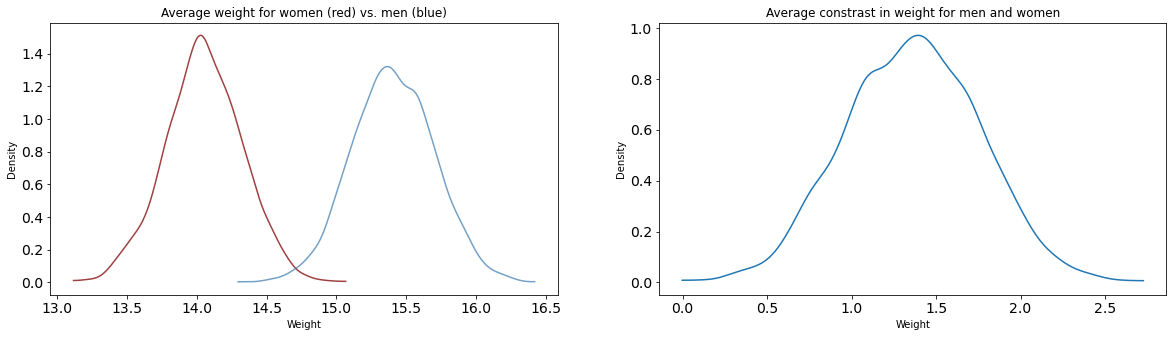

In [42]:
alpha_contrast = m3['alpha'][1] - m3['alpha'][0]

plt.figure(figsize=(20,10))
_, ax = plt.subplots(1, 2, figsize=(20,5))

az.plot_kde(m3['alpha'][0], plot_kwargs={"color":"maroon", "alpha":.75}, ax=ax[0])
ax[0].set_title("Average weight for women (red) vs. men (blue)")
ax[0].set_ylabel("Density")
ax[0].set_xlabel("Weight")

az.plot_kde(m3['alpha'][1], plot_kwargs={"color":"steelblue", "alpha":.75}, ax=ax[0])
az.plot_kde(alpha_contrast, ax=ax[1])
ax[1].set_title("Average constrast in weight for men and women")
ax[1].set_ylabel("Density")
ax[1].set_xlabel("Weight")

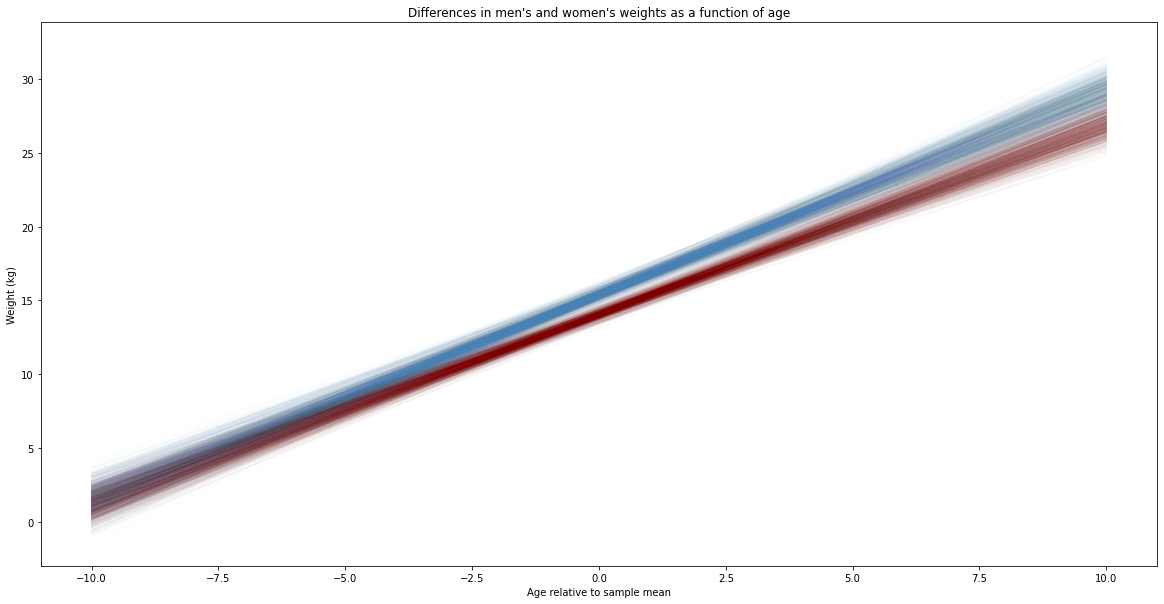

In [43]:
samples = np.random.randint(0,4000,1000)
x = np.linspace(-10, 10, 1000) 
plt.figure(figsize=(20,10))
plt.title("Differences in men's and women's weights as a function of age")
plt.ylabel("Weight (kg)")
plt.xlabel("Age relative to sample mean")

for i in samples:
    plt.plot(
        x,
        m3['alpha'][0][i]+m3['beta'][0][i]*x,
        color='maroon',
        alpha=.01)
    plt.plot(
        x,
        m3['alpha'][1][i]+m3['beta'][1][i]*x,
        color='steelblue',
        alpha=.01)

## Question 4